In [4]:
import pandas as pd
import numpy as np

import matplotlib.pylab as pl

from sklearn.cluster import KMeans

from sklearn.preprocessing import scale

In [5]:
DATA = '../data'

In [6]:
yelp = pd.read_csv(DATA + '/yelp_counts_per_ct.csv', index_col=0)
yelp.head()

,FIPS,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,Caribbean,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,36005000200,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36005001900,5.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,36005002000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36005002500,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36005002701,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# As an alternative, look for an elbow in the within-cluster SSE (k-means example):
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(X_scale)
    SSE.append(res.inertia_)
print(SSE)

[44987.789637716305, 38431.497922365816, 34973.775852852086, 32199.798632709833, 30246.371251441415, 28387.091149915803, 26879.483546499916, 26126.08215044238]


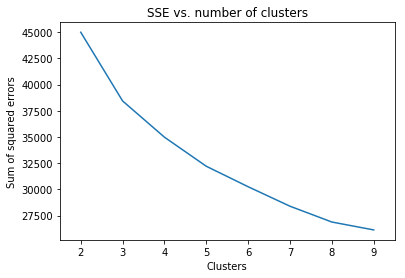

In [14]:
pl.gca()
pl.plot(range(2,10),SSE)
pl.xlabel("Clusters")
pl.ylabel("Sum of squared errors")
pl.title("SSE vs. number of clusters")
pl.xlim(1.5,9.5)
pl.show()

In [15]:
km = KMeans(random_state=234,n_clusters=4)
res=km.fit(X)

In [29]:
res.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
yelp['label'] = res.labels_

In [31]:
rs =pd.DataFrame(km.transform(X))
rs = pd.concat((rs,pd.DataFrame(km.fit_predict(X))),axis=1)
rs.columns=list(range(4))+["cluster"]
yelp.loc[:,"score"]=rs.apply(lambda x: x[int(x["cluster"])],axis=1)

In [32]:
yelp.sort_values('score', ascending=False, inplace=True)
yelp.head()

,FIPS,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,Caribbean,...,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
762,36061004100,98.0,47.0,41.0,1.0,2.0,7.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,3.0,1.0,0.0,6.0,2,36.881659
759,36061003800,122.0,71.0,17.0,0.0,26.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,2,35.526565
1156,36081028900,47.0,41.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23.520509
784,36061006500,93.0,33.0,37.0,3.0,14.0,6.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,2.0,2,21.558219
1357,36081087100,85.0,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,10.0,0.0,0.0,0.0,2.0,3,19.515039


In [33]:
import os
import geopandas as gpd

In [34]:
for file in os.listdir(DATA + '/2010CensusTract'):
    if 'shp' in file:
        ct_2010 = gpd.read_file(DATA + '/2010CensusTract/' + file)

print(ct_2010.crs)
ct_2010.head()

{'init': 'epsg:4326'}


,puma,boro_ct201,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
0,3903,5000900,000900,West New Brighton-New Brighton-St. George,SI22,Staten Island,7729.016794,2.497010e+06,I,5,9,POLYGON ((-74.07920577013245 40.64343078374567...
1,3808,1009800,009800,Turtle Bay-East Midtown,MN19,Manhattan,5534.199811,1.906016e+06,I,1,98,POLYGON ((-73.96432543478758 40.75638153099091...
2,3808,1010000,010000,Turtle Bay-East Midtown,MN19,Manhattan,5692.168737,1.860938e+06,I,1,100,POLYGON ((-73.96802436915851 40.75957814005282...
3,3807,1010200,010200,Midtown-Midtown South,MN17,Manhattan,5687.802439,1.860993e+06,I,1,102,POLYGON ((-73.97124277307127 40.76093641847906...
4,3807,1010400,010400,Midtown-Midtown South,MN17,Manhattan,5693.036367,1.864600e+06,I,1,104,POLYGON ((-73.97445730550224 40.76229308352487...


In [35]:
boro_county = {
    'Bronx': '005',
    'Brooklyn': '047',
    'Manhattan': '061',
    'Queens': '081',
    'Staten Island': '085'
}

In [38]:
ct_2010['County'] = ct_2010['boro_name'].map(boro_county)
ct_2010['FIPS'] =  '36' + ct_2010['County'] + ct_2010['ct2010']
ct_2010['FIPS'] = pd.to_numeric(ct_2010['FIPS'])

In [39]:
yelp_cluster = ct_2010[['FIPS','geometry']].merge(yelp, on='FIPS')

In [40]:
yelp_cluster.head()

,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,...,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
0,36085000900,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.985464
1,36061009800,POLYGON ((-73.96432543478758 40.75638153099091...,80.0,32.0,25.0,1.0,13.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,4.0,0.0,1.0,2,15.850451
2,36061010000,POLYGON ((-73.96802436915851 40.75957814005282...,38.0,17.0,11.0,2.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,6.149537
3,36061010200,POLYGON ((-73.97124277307127 40.76093641847906...,23.0,4.0,11.0,1.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,6.090714
4,36061010400,POLYGON ((-73.97445730550224 40.76229308352487...,49.0,20.0,18.0,0.0,4.0,7.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2,8.820249


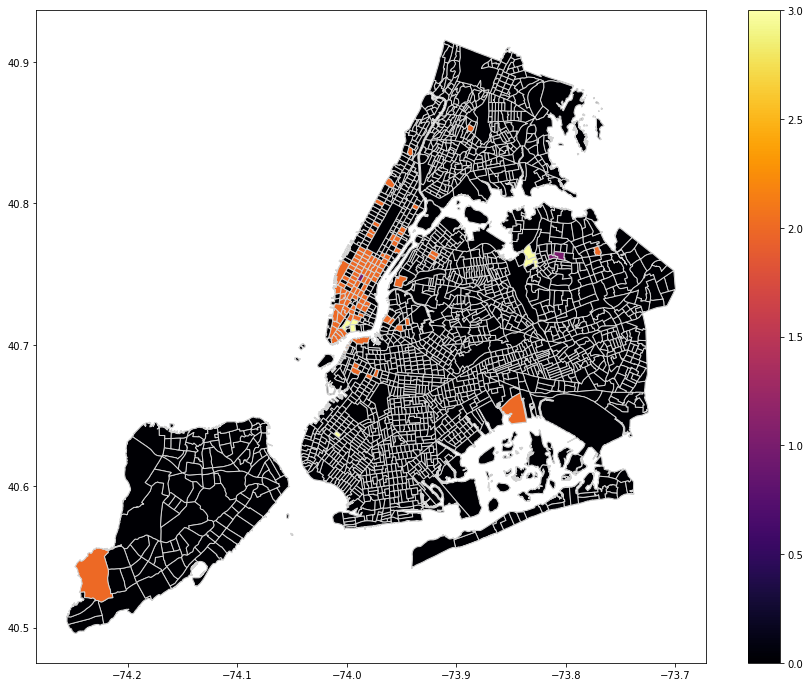

In [41]:
fig = pl.figure(figsize=(15,12))
ax = fig.add_subplot(111)
ct_2010.plot(ax=ax, edgecolor='lightgray', color='white')
yelp_cluster.plot(ax=ax, column='label', cmap='inferno', edgecolor='lightgray', legend=True);

In [42]:
yelp['label'].value_counts()

0    2056
2     100
3       7
1       3
Name: label, dtype: int64

### Further cluster cluster 0

In [43]:
yelp_0 = yelp[yelp['label'] == 0]
yelp_0.head()

,FIPS,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,Caribbean,...,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
1156,36081028900,47.0,41.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23.520509
1138,36081026300,19.0,14.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.319606
1349,36081084900,18.0,14.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0,10.798577
254,36047010800,16.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0,9.724729
1157,36081029100,15.0,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.289880


In [44]:
X0 = yelp_0.iloc[:,7:-2]
X0.head()

,Armenian,Cambodian,Caribbean,Chinese,Colombian,Cuban,Dominican,Filipino,French,German,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
1156,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1138,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,0.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
1157,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# As an alternative, look for an elbow in the within-cluster SSE (k-means example):
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(X0)
    SSE.append(res.inertia_)
print(SSE)

[10692.783572889193, 9933.75734056441, 9294.066635675925, 8658.199451167065, 8129.5446328626085, 7769.013430524866, 7465.37848825504, 7097.489306931878]


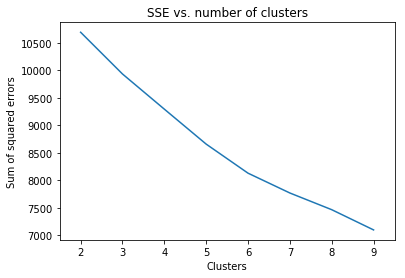

In [46]:
pl.gca()
pl.plot(range(2,10),SSE)
pl.xlabel("Clusters")
pl.ylabel("Sum of squared errors")
pl.title("SSE vs. number of clusters")
pl.xlim(1.5,9.5)
pl.show()

In [47]:
km0 = KMeans(random_state=234,n_clusters=3)
res0=km0.fit(X0)

In [48]:
yelp_0['label_0'] = res0.labels_

/Users/unissechua/devel/PUI2017/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
yelp0_cluster = ct_2010[['FIPS','geometry']].merge(yelp_0, on='FIPS')

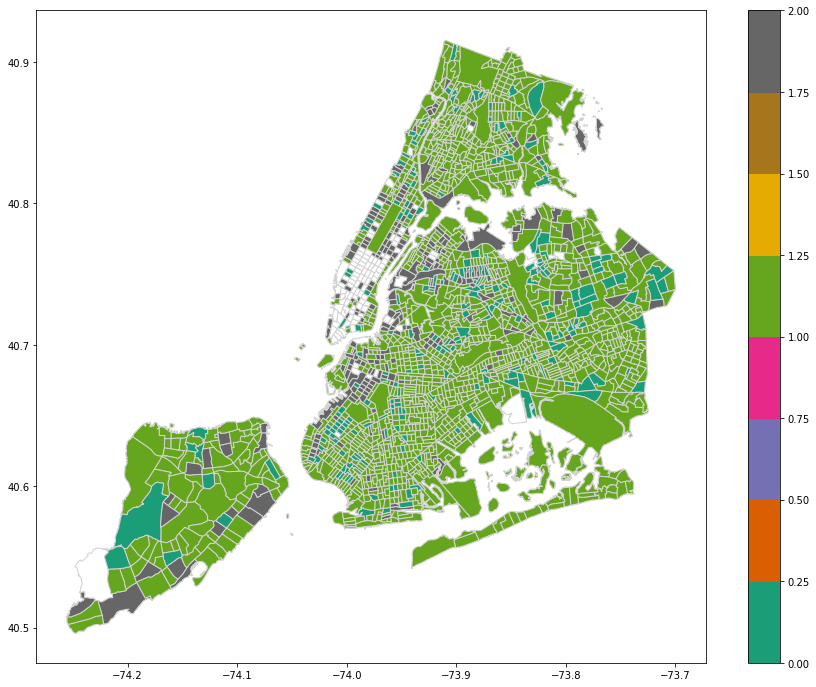

In [50]:
fig = pl.figure(figsize=(15,12))
ax = fig.add_subplot(111)
ct_2010.plot(ax=ax, edgecolor='lightgray', color='white')
yelp0_cluster.plot(ax=ax, column='label_0', cmap='Dark2', edgecolor='lightgray', legend=True);

In [51]:
yelp0_cluster[yelp0_cluster['label_0'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,241.0,3.605882e+10,2.412794e+07,3.600500e+10,3.604703e+10,3.606102e+10,3.608105e+10,3.608502e+10
Total,241.0,7.647303e+00,4.839516e+00,2.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,4.700000e+01
asian,241.0,4.518672e+00,3.537988e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,4.100000e+01
european,241.0,8.713693e-01,1.439057e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00
halal,241.0,1.991701e-01,6.001383e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
hispanic,241.0,1.775934e+00,2.103470e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.100000e+01
midmed,241.0,2.821577e-01,7.979486e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
Armenian,241.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cambodian,241.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Caribbean,241.0,2.946058e-01,7.305334e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
